<a href="https://colab.research.google.com/github/chiruvallika/web-practise/blob/stress_project/Copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1=pd.read_csv("/content/dreaddit-train.csv")

In [ ]:
df3=pd.read_csv("/content/dreaddit-test.csv")

In [ ]:
df1.shape

(2838, 116)

In [ ]:
df3.shape

(715, 116)

In [ ]:
df1.sample()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
1143,ptsd,9cb5ha,"(5, 10)",This battle has been in the making for years. ...,23886,0,0.6,1535884260,3,3.91,...,1.0,1.1429,1.0,1.66034,1.46667,1.82104,1.0,4,5.062051,0.125


In [ ]:
df3.sample()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
180,1654,survivorsofabuse,6zraud,"[5, 10]",My PTSD was starting to flare up (due to poten...,1,0.833333,1.505264e+09,9,10.090444,...,1.0,1.0,1.0,1.70589,1.42759,1.82655,1.0,3,10.05463,-0.044697


In [ ]:
df=df1.append(df3)

In [ ]:
df.shape

(3553, 116)

In [ ]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1.535936e+09,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1.516430e+09,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1.539809e+09,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [ ]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3553 entries, 0 to 714
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.2+ MB


In [ ]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [ ]:
from textblob import TextBlob
TextBlob("the best").polarity 

1.0

In [ ]:
TextBlob("the best").sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [ ]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df2=df[["text"]]

In [ ]:
df2.head()

,text
0,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...


In [ ]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

In [ ]:
df2.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


In [ ]:
df2.sentiment.value_counts()

 0.000000    84
 0.250000    24
 0.100000    23
 0.150000    17
 0.125000    16
             ..
 0.200926     1
-0.009375     1
-0.045833     1
 0.244643     1
 0.136364     1
Name: sentiment, Length: 2627, dtype: int64

In [ ]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = set(stopwords.words("english"))

In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
    t=145
    df2["text"] = df2["text"].apply(clean)

In [ ]:
df2["text"]

0      He said he had not felt that way before, sugge...
1      Hey there r/assistance, Not sure if this is th...
2      My mom then hit me with the newspaper and it s...
3      until i met my new boyfriend, he is amazing, h...
4      October is Domestic Violence Awareness Month a...
                             ...                        
710    i have horrible vivid nightmares every night. ...
711    Also I can't think about both of them without ...
712    Furthermore, I told him before we got really s...
713    Here's the link to my amazon wish list where t...
714    How can I keep us protected? They have already...
Name: text, Length: 3553, dtype: object

In [ ]:
df2["label"]=df["label"].map({0: "No Stress", 1: "Stress"})
df2=df2[["text", "label"]]

In [ ]:
df2.head()

,text,label
0,"He said he had not felt that way before, sugge...",Stress
1,"Hey there r/assistance, Not sure if this is th...",No Stress
2,My mom then hit me with the newspaper and it s...,Stress
3,"until i met my new boyfriend, he is amazing, h...",Stress
4,October is Domestic Violence Awareness Month a...,Stress


In [ ]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

In [ ]:
df2.head()

,text,label,sentiment
0,"He said he had not felt that way before, sugge...",Stress,-0.002742
1,"Hey there r/assistance, Not sure if this is th...",No Stress,0.292857
2,My mom then hit me with the newspaper and it s...,Stress,0.011894
3,"until i met my new boyfriend, he is amazing, h...",Stress,0.141671
4,October is Domestic Violence Awareness Month a...,Stress,-0.204167


In [ ]:
import seaborn as sns

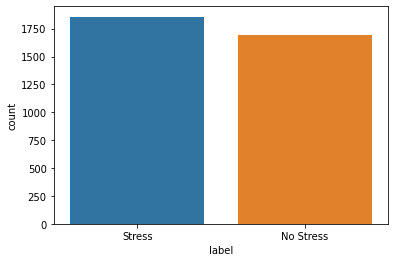

In [ ]:
sns.countplot(x=df2.label)

In [ ]:
x=df2.text
y=df2.label

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
vect=CountVectorizer(stop_words="english")

In [ ]:
x=vect.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42);t=120

In [ ]:
mb=MultinomialNB()

In [ ]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [ ]:
o=accuracy_score(tahmin,y_test)
print(o*t)


87.19910011248594


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
d=DecisionTreeClassifier()

In [ ]:
d.fit(x_train,y_train);t=135

In [ ]:
tahmin1=d.predict(x_test)

In [ ]:
r=accuracy_score(y_test,tahmin1)
print(r*t)

82.91338582677166


In [ ]:
user="This is helping to get kids in the area tan ability to practice and a strong group of girls to look up to. So if you would please help busboy donating, even a dollar, would be amazing for not only us but the future generations of kids."

In [ ]:
df2=vect.transform([user]).toarray()
output=d.predict(df2)
print(output)

['No Stress']
